In [ ]:
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
path_df = "/content/drive/MyDrive/Colab Notebooks/WELL/new_combined_df.csv"

In [ ]:
df = pd.read_csv(path_df)

In [ ]:
# sns.histplot(y.sum(axis=0))

In [ ]:
emotion_frequency = df.drop(columns="text").sum(axis=0)

In [ ]:
df.head()

,text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(columns="text").value_counts(normalize=True)

admiration  amusement  anger  annoyance  approval  caring  confusion  curiosity  desire  disappointment  disapproval  disgust  embarrassment  excitement  fear  gratitude  grief  joy  love  nervousness  optimism  pride  realization  relief  remorse  sadness  surprise  neutral
0           0          0      0          0         0       0          0          0       0               0            0        0              0           0     0          0      1    0     0            0         0      0            0       0        0        0         0          0.231510
                                                                                                                                                                                  0    0     0            0         0      0            0       0        1        0         0          0.199056
                       1      0          0         0       0          0          0       0               0            0        0              0     

In [ ]:
!mv ./emotion_frequency.csv drive/MyDrive/Colab\ Notebooks/WELL

In [ ]:
emotion_frequency.sum()

666338

In [ ]:
!ls drive/MyDrive/Colab\ Notebooks/WELL

emotion_frequency.csv  moritzb6626_emotion_analysis.ipynb  new_combined_df.csv


In [ ]:
emotion_frequency.to_csv("emotion_frequency.csv")

In [ ]:
emotion_frequency.sort_values(ascending=True) / emotion_frequency.sum()

grief             0.001010
relief            0.001934
pride             0.001954
nervousness       0.002716
embarrassment     0.003716
remorse           0.003789
desire            0.005728
disgust           0.007955
excitement        0.008448
caring            0.009003
confusion         0.011044
disappointment    0.012710
optimism          0.013079
realization       0.013184
amusement         0.013874
curiosity         0.014545
disapproval       0.017144
gratitude         0.017446
annoyance         0.020437
admiration        0.025709
approval          0.026443
surprise          0.030744
love              0.064149
fear              0.076401
neutral           0.082988
anger             0.098150
sadness           0.192012
joy               0.223685
dtype: float64

In [ ]:
# df.isna().sum()

In [ ]:
X_text = df.text.values
y = df.drop(columns="text").values

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
X_words = [text_to_word_sequence(sentence) for sentence in X_text]
X_words

[['that', 'game', 'hurt'],
 ['sexuality',
  'shouldn’t',
  'be',
  'a',
  'grouping',
  'category',
  'it',
  'makes',
  'you',
  'different',
  'from',
  'othet',
  'ppl',
  'so',
  'imo',
  'it',
  'fits',
  'the',
  'definition',
  'of',
  'grouping'],
 ['you', 'do', 'right', 'if', 'you', "don't", 'care', 'then', 'fuck', "'em"],
 ['man', 'i', 'love', 'reddit'],
 ['name',
  'was',
  'nowhere',
  'near',
  'them',
  'he',
  'was',
  'by',
  'the',
  'falcon'],
 ['right',
  'considering',
  'it’s',
  'such',
  'an',
  'important',
  'document',
  'i',
  'should',
  'know',
  'the',
  'damned',
  'thing',
  'backwards',
  'and',
  'forwards',
  'thanks',
  'again',
  'for',
  'the',
  'help'],
 ['he',
  "isn't",
  'as',
  'big',
  'but',
  "he's",
  'still',
  'quite',
  'popular',
  "i've",
  'heard',
  'the',
  'same',
  'thing',
  'about',
  'his',
  'content',
  'never',
  'watched',
  'him',
  'much'],
 ["that's",
  'crazy',
  'i',
  'went',
  'to',
  'a',
  'super',
  'religion',


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer



tk = Tokenizer()
tk.fit_on_texts(X_words)
X_tokens = tk.texts_to_sequences(X_text)
X_tokens

[[7, 289, 293],
 [4630,
  3992,
  25,
  6,
  12358,
  4039,
  11,
  153,
  16,
  387,
  58,
  27710,
  3186,
  18,
  2302,
  11,
  3013,
  2,
  3000,
  8,
  12358],
 [16, 38, 106, 43, 16, 177, 302, 112, 436, 9161],
 [214, 1, 73, 984],
 [36, 20, 2621, 1166, 69, 49, 20, 52, 2, 13765],
 [106,
  1349,
  279,
  183,
  71,
  354,
  3993,
  1,
  121,
  47,
  2,
  4062,
  159,
  4282,
  4,
  8576,
  216,
  138,
  14,
  2,
  141],
 [49,
  676,
  31,
  334,
  21,
  504,
  77,
  186,
  666,
  420,
  549,
  2,
  178,
  159,
  29,
  93,
  543,
  113,
  1105,
  79,
  82],
 [225,
  584,
  1,
  274,
  3,
  6,
  367,
  1129,
  481,
  280,
  4,
  1,
  64,
  1,
  41,
  208,
  525,
  635,
  2,
  809,
  1173,
  198,
  7,
  1540,
  2930,
  2258],
 [225, 2727, 12999],
 [10393, 15697, 10181, 27711, 566, 27712, 1681, 9324, 6189, 13, 83, 268],
 [1, 19, 4, 61, 7, 16, 1274, 11, 1, 64, 225, 42, 3256, 10, 4221],
 [1, 262, 3, 2696, 17, 21, 136, 24, 70, 1387, 7714],
 [21, 136, 66, 542, 101],
 [7, 13, 1563],
 [1764, 6

In [ ]:
vocab_size = len(tk.word_index)
vocab_size

86587

(0.0, 50.0)

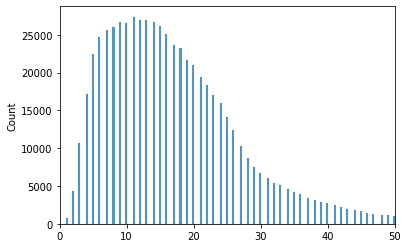

In [ ]:
import seaborn as sns
sns.histplot([len(x) for x in X_tokens])
plt.xlim((0,50))

In [ ]:
maxlen = 30

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_pad = pad_sequences(X_tokens, dtype=float, padding='post', maxlen=maxlen)
X_pad.shape

(628034, 30)

In [ ]:
# y_mean = y.mean()
# mae_baseline = np.mean(np.abs(y - y_mean))
# print("MAE Baseline:", f"{mae_baseline:.2f}")

In [ ]:
for i, e in enumerate(y.sum(axis=0)):
  if e == 149050:
    print(i)

17


In [ ]:
# df.columns[17+1]

In [ ]:
accuracy_baseline = 149050 / y.sum()
accuracy_baseline

0.22368527684148284

In [ ]:
embedding_size = 40

In [ ]:
df.columns.__len__() - 1

28

In [ ]:
y.shape

(628034, 28)

In [ ]:
import numpy as np
from numpy import random as random
import tensorflow as tf
import keras
import keras.backend as K

tf.config.experimental_run_functions_eagerly(False)

VERBOSE = 1

keras.backend.clear_session()
sess = tf.compat.v1.Session()
sess.as_default()
NUM_CLASSES = 28
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 200
embed_dim = 8

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
class CategoricalTruePositives(tf.keras.metrics.Metric):

    def __init__(self, num_classes, batch_size,
                 name="categorical_true_positives", **kwargs):
        super(CategoricalTruePositives, self).__init__(name=name, **kwargs)

        self.batch_size = batch_size
        self.num_classes = num_classes    

        self.cat_true_positives = self.add_weight(name="ctp", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):     

        y_true = K.argmax(y_true, axis=-1)
        y_pred = K.argmax(y_pred, axis=-1)
        y_true = K.flatten(y_true)

        true_poss = K.sum(K.cast((K.equal(y_true, y_pred)), dtype=tf.float32))

        self.cat_true_positives.assign_add(true_poss)

    def result(self):

        return self.cat_true_positives

In [ ]:
METRICS = [
  tf.keras.metrics.CategoricalAccuracy(name='acc'),
  CategoricalTruePositives(NUM_CLASSES, BATCH_SIZE)
]

In [ ]:
from tensorflow.keras import metrics

In [ ]:
metrics.Precision()
metrics.Recall()

In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

def build_model_nlp():
    model = Sequential([
        layers.Embedding(input_dim=vocab_size+1, input_length=maxlen, output_dim=embedding_size, mask_zero=True),
        layers.Conv1D(10, kernel_size=15, padding='same', activation="relu"),
        layers.Conv1D(12, kernel_size=10, padding='same', activation="relu"),
        layers.Conv1D(15, kernel_size=10, padding='same', activation="relu"),
        layers.Flatten(),
        # Maybe add some more dense layers next time. Seem to change well during training.
        # Yet best changes so far after adding Conv1D layer
        layers.Dense(60, activation='tanh'),
        layers.Dropout(0.3),
        layers.Dense(30, activation='tanh'),
        layers.Dropout(0.15),
        layers.Dense(28, activation='softmax'),
    ])

    model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=1e-5), metrics=['accuracy', metrics.Precision(), metrics.Recall(), METRICS])
    return model

model_nlp = build_model_nlp()
model_nlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 40)            3463520   
                                                                 
 conv1d (Conv1D)             (None, 30, 10)            6010      
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 12)            1212      
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 15)            1815      
                                                                 
 flatten (Flatten)           (None, 450)               0         
                                                                 
 dense (Dense)               (None, 60)                27060     
                                                                 
 dropout (Dropout)           (None, 60)                0

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/ 

# We will store the logs in a folder (one folder per fit)
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [ ]:
from tensorflow import convert_to_tensor

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5)

model_nlp = build_model_nlp()
model_nlp.fit(convert_to_tensor(X_pad), convert_to_tensor(y), 
          validation_split=0.3,
          epochs=10, 
          batch_size=64,
          callbacks=[es, tensorboard_callback],
          shuffle=True
          )

Epoch 1/10
6870/6870 [==============================] - 479s 69ms/step - loss: 3.1175 - accuracy: 0.1778 - precision_2: 0.6471 - recall_2: 2.3016e-05 - val_loss: 1.9788 - val_accuracy: 0.3368 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/10
6870/6870 [==============================] - 455s 66ms/step - loss: 2.7204 - accuracy: 0.2795 - precision_2: 0.3421 - recall_2: 0.0031 - val_loss: 1.7057 - val_accuracy: 0.3372 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 3/10
6870/6870 [==============================] - 467s 68ms/step - loss: 2.6079 - accuracy: 0.2886 - precision_2: 0.3494 - recall_2: 0.0070 - val_loss: 1.6082 - val_accuracy: 0.3563 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 4/10
6870/6870 [==============================] - 459s 67ms/step - loss: 2.5508 - accuracy: 0.3028 - precision_2: 0.4040 - recall_2: 0.0117 - val_loss: 1.5180 - val_accuracy: 0.4356 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 5/10
6870/

In [ ]:
result = model.predict(convert_to_tensor(X_pad))

pred_size = X_pad.shape[0]

preds = K.argmax(result, axis=-1)
preds = K.one_hot(preds, 28)

print("\nTrue positives per classes:")
for i in range(4):
    m = tf.keras.metrics.TruePositives(name='tp')    
    m.update_state(y[:, i], preds[:, i])
    print("Class {} true positive = {}".format(i, m.result()))

In [ ]:
!ls

In [ ]:
# ! saved_model/

In [ ]:
model_nlp.save('saved_model/nlp_model82')

In [ ]:
%tensorboard --logdir logs/fit